In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = tf.compat.v1.InteractiveSession(config=config)

In [39]:
import os, re, glob
import cv2

image_size = 227

#groups_folder_path = '../Images/After_AAFT/'
#groups_folder_path = '../Images/After_image/'
groups_folder_path = '../Images/After_resultFigs/'

X_s = []

y = []

In [40]:
for label in ['Bi', 'Tri']:

    for feature in ['striping_midAng_bw']:

        for top, dir, f in os.walk(groups_folder_path + label + "/" + feature + "/"):
            #print(f)
            for filename in f:
                #print(groups_folder_path + label + "/" + feature + "/" + filename)
                img = cv2.imread(groups_folder_path + label + "/" + feature + "/" + filename)
                img = cv2.resize(img, None, fx=image_size / img.shape[0], fy=image_size / img.shape[1])
                
                X_s.append(img / 256)

                if label == 'Bi':
                    y.append(2)
                else:
                    y.append(3)

print(X_s[0].shape)

(227, 227, 3)


In [41]:
X = np.array(X_s)
y = np.array(y)

In [42]:
# train, test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# validation split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=10, stratify=y_train)
print(len(y))
print(len(y_train))
AlexNet = keras.models.Sequential([
        keras.layers.Conv2D(256, (6, 6), activation='relu', input_shape=X_train[0].shape),
        keras.layers.MaxPooling2D( (2, 2) ),
        keras.layers.BatchNormalization(),


        keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        keras.layers.MaxPooling2D( (2, 2) ),
        keras.layers.BatchNormalization(),

        keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        keras.layers.MaxPooling2D( (2, 2) ),
        keras.layers.BatchNormalization(),

        keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        keras.layers.MaxPooling2D( (2, 2) ),
        keras.layers.BatchNormalization(),

        keras.layers.Flatten(),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dense(1024, activation='relu'),

        keras.layers.Dense(len(y_train), activation='softmax')
])

1200
864


In [43]:
AlexNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 256)     27904     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 256)     0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 111, 111, 256)     1024      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 111, 111, 384)     885120    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 55, 55, 384)       0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 55, 55, 384)       1536      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 55, 55, 384)      

In [44]:
AlexNet.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [45]:
AlexNet_history = AlexNet.fit(X_train, y_train, epochs=10, batch_size=16,
                    validation_data=(X_validation, y_validation))

Epoch 1/10
54/54 [==============================] - 8s 138ms/step - loss: 0.5973 - sparse_categorical_accuracy: 0.9165 - val_loss: 5.6871 - val_sparse_categorical_accuracy: 0.5417
Epoch 2/10
54/54 [==============================] - 7s 135ms/step - loss: 2.8771e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 4.8266 - val_sparse_categorical_accuracy: 0.5625
Epoch 3/10
54/54 [==============================] - 7s 137ms/step - loss: 1.4434e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.9445 - val_sparse_categorical_accuracy: 0.8229
Epoch 4/10
54/54 [==============================] - 7s 137ms/step - loss: 1.4643e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.9278 - val_sparse_categorical_accuracy: 0.9792
Epoch 5/10
54/54 [==============================] - 7s 136ms/step - loss: 8.9676e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.7441 - val_sparse_categorical_accuracy: 0.9792
Epoch 6/10
54/54 [==============================] - 7s 136ms/step - loss: 8.0157e-05

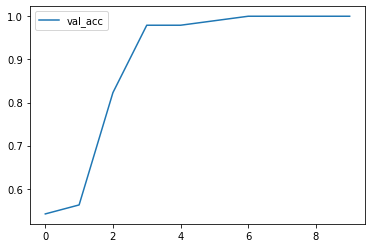

In [46]:
import matplotlib.pyplot as plt

#print(AlexNet_history.history)

plt.plot(AlexNet_history.history['val_sparse_categorical_accuracy'])
plt.legend(['val_acc'], loc= 'upper left')
plt.show()

In [47]:
loss_and_metric = AlexNet.evaluate(X_train, y_train, batch_size = 16, verbose=1)

54/54 [==============================] - 2s 41ms/step - loss: 0.0019 - sparse_categorical_accuracy: 1.0000


In [48]:
print(f"Train, loss and metric: {loss_and_metric}")

Train, loss and metric: [0.0018859440460801125, 1.0]


In [49]:
loss_and_metric = AlexNet.evaluate(X_test, y_test, batch_size = 16, verbose=1)

15/15 [==============================] - 1s 41ms/step - loss: 0.0032 - sparse_categorical_accuracy: 1.0000


In [50]:
print(f"Test, loss and metric: {loss_and_metric}")

Test, loss and metric: [0.0032258464489132166, 1.0]
